<a href="https://colab.research.google.com/github/FIngul98/Credit_Default_Project/blob/main/Random_Forest_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Default Prediction 

##### Dataset: https://www.kaggle.com/datasets/wordsforthewise/lending-club


### Import libraries 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read dataset

In [ ]:
url = 'https://raw.githubusercontent.com/FIngul98/Loan_Dataset/main/loan_data.csv'
loan_data= pd.read_csv(url)
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
loan_data['credit.policy'].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

In [ ]:
loan_data[loan_data['credit.policy'] == 0]['not.fully.paid'].value_counts()

0    1349
1     519
Name: not.fully.paid, dtype: int64

In [ ]:
min(loan_data['fico'])

612

In [ ]:
max(loan_data['dti'])

29.96

In [ ]:
loan_data[loan_data['credit.policy'] == 0]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
7710,0,debt_consolidation,0.1608,35.20,10.308953,23.84,642,2490.000000,10125,90.4,1,0,0,0
7711,0,debt_consolidation,0.1608,246.38,12.152144,22.47,647,7212.000000,150971,92.3,4,0,0,1
7712,0,debt_consolidation,0.1600,787.53,11.264464,19.34,682,3780.041667,15897,66.0,5,0,1,0
7713,0,educational,0.1640,126.40,10.308953,29.60,677,1643.000000,3043,58.5,1,0,0,1
7714,0,debt_consolidation,0.1482,242.05,10.714418,19.12,652,2847.000000,26531,52.6,33,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


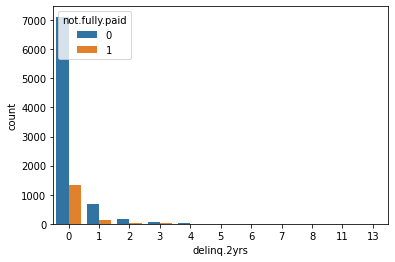

In [ ]:
sns.countplot(data=loan_data, x='delinq.2yrs', hue='not.fully.paid')

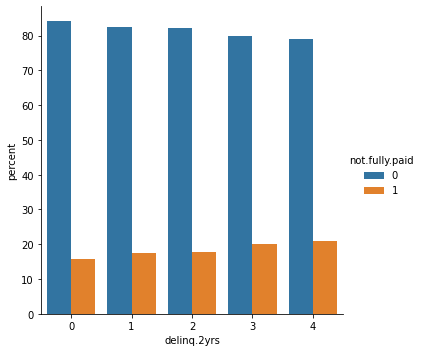

In [ ]:
x,y = 'delinq.2yrs', 'not.fully.paid'

(loan_data[loan_data['delinq.2yrs'] < 5]
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))



In [ ]:
loan_data[loan_data['delinq.2yrs'] > 5]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
1525,1,all_other,0.1114,196.84,11.082143,22.41,697,7350.041667,2611,7.8,0,6,0,0
7789,0,debt_consolidation,0.1407,171.05,10.714418,0.53,642,2846.000000,123,41.0,6,13,0,0
7952,0,debt_consolidation,0.1470,324.48,11.170435,21.58,657,2984.000000,1992,18.3,3,6,0,0
8118,0,debt_consolidation,0.1330,169.20,10.341742,16.88,657,5129.000000,2229,51.8,1,7,0,0
8234,0,debt_consolidation,0.1482,414.93,11.396392,3.49,652,5190.000000,8016,61.7,11,8,0,0
8548,0,all_other,0.1861,291.68,12.301383,6.87,647,4049.958333,378,5.0,0,11,1,0


In [ ]:
# Dataframe cleanup
loan_data.columns = [c.replace('.', '_') for c in loan_data.columns]
loan_data.head(5)

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### Exploratory Data Analysis 


In [39]:
from scipy.stats import pearsonr
def r2(x, y):
    return pearsonr(x, y)[0] ** 2

<Figure size 1152x432 with 0 Axes>

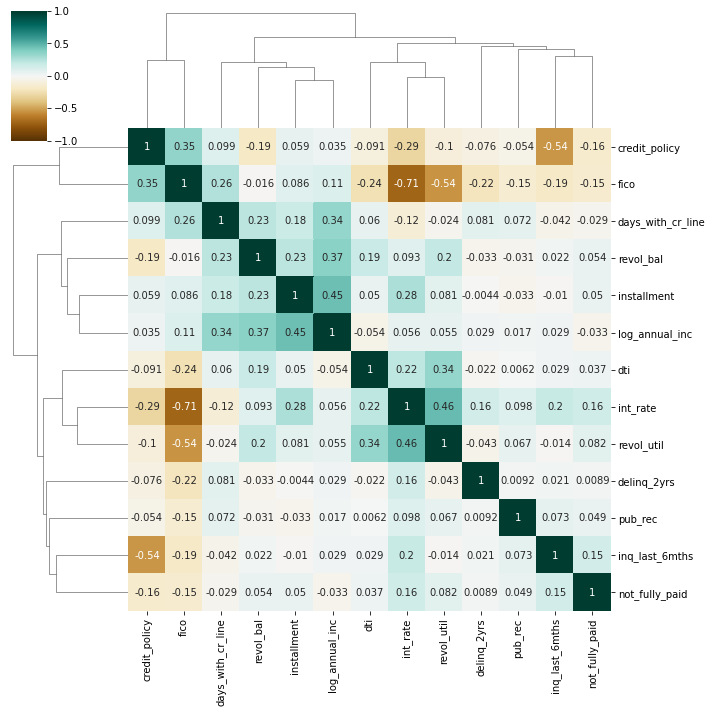

In [12]:
plt.figure(figsize=(16, 6))
clustermap = sns.clustermap(loan_data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
#clustermap.set_title('Cluster Heatmap', fontdict={'fontsize':18}, pad=12);

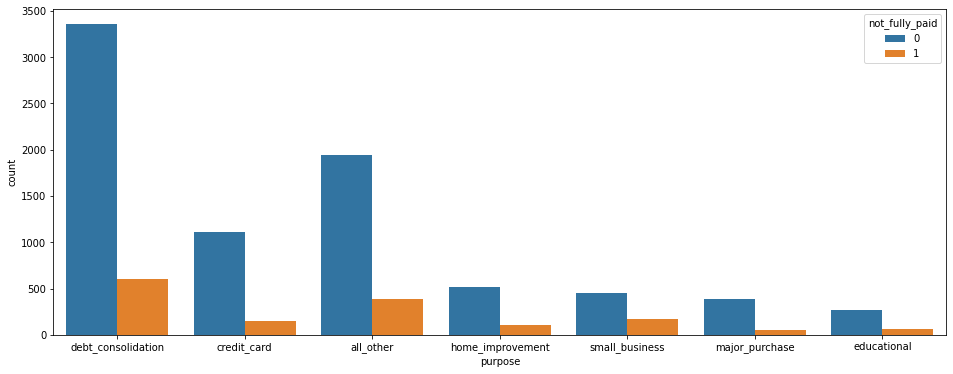

In [13]:
plt.figure(figsize=(16, 6))
sns.countplot(x=loan_data['purpose'],hue=loan_data['not_fully_paid'])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


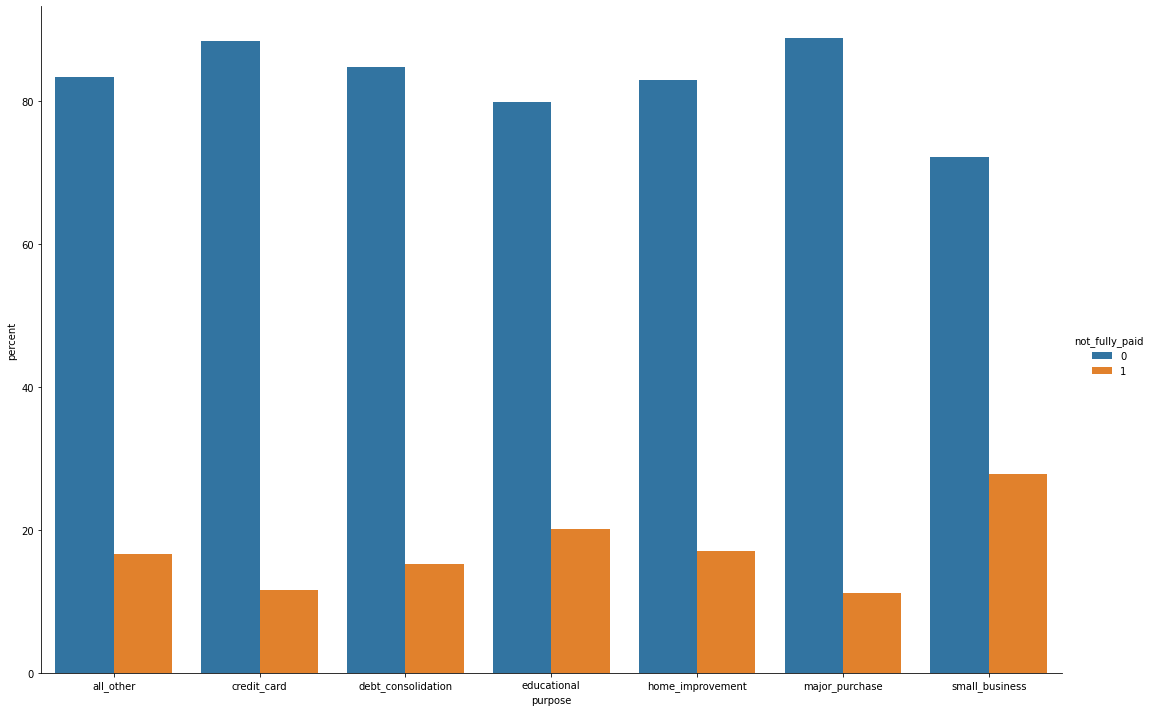

In [14]:
x, y = 'purpose', 'not_fully_paid'
(loan_data.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',size=10, aspect = 1.5))


Loans for **small businesses** and **educational purposes** default more than other loan types.

*Statistical signifance for the aforementioned groups are to be explored further.* 

*Null hypothesis = there is no difference among loan purposes on default rate.*

In [18]:
!pip install researchpy
import researchpy as rp
rp.summary_cont(loan_data['not_fully_paid'].groupby(loan_data['purpose']))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/




,N,Mean,SD,SE,95% Conf.,Interval
purpose,,,,,,
all_other,2331,0.1660,0.3722,0.0077,0.1509,0.1811
credit_card,1262,0.1157,0.3200,0.0090,0.0980,0.1334
debt_consolidation,3957,0.1524,0.3594,0.0057,0.1412,0.1636
educational,343,0.2012,0.4015,0.0217,0.1585,0.2438
home_improvement,629,0.1701,0.3760,0.0150,0.1407,0.1996
major_purchase,437,0.1121,0.3159,0.0151,0.0824,0.1418
small_business,619,0.2779,0.4483,0.0180,0.2425,0.3133


In [19]:
import scipy.stats as stats
stats.f_oneway(loan_data['not_fully_paid'][loan_data['purpose']=='all_other'],
               loan_data['not_fully_paid'][loan_data['purpose']=='credit_card'],
               loan_data['not_fully_paid'][loan_data['purpose']=='debt_consolidation'],
               loan_data['not_fully_paid'][loan_data['purpose']=='educational'],
               loan_data['not_fully_paid'][loan_data['purpose']=='home_improvement'],
               loan_data['not_fully_paid'][loan_data['purpose']=='major_purchase'],
               loan_data['not_fully_paid'][loan_data['purpose']=='small_business'])

F_onewayResult(statistic=16.317530253799514, pvalue=8.626801924479205e-19)

P < 0.05 

Loan purpose does in fact effect default rate.

#### Hypothesis: Small business and education loans have higher default rates due to higher debt levels (DTI).

Step 1: Examening the relationship between DTS

In [26]:
print("DTI for small_business loans", np.mean(loan_data.loc[loan_data['purpose'] == 'small_business']['dti']))
print("DTI for small_business loans", np.mean(loan_data.loc[loan_data['purpose'] == 'educational']['dti']))
print("DTI for small_business loans", np.mean(loan_data.loc[loan_data['purpose'] != ('educational' or 'small_business')]['dti']))


DTI for small_business loans 10.79329563812601
DTI for small_business loans 11.344927113702624
DTI for small_business loans 12.653541959935032


Contrary to our hypothesis, small business and educational loanees have lower DTI than other loanees. 

We divide by income to get debt levels.

In [35]:
debt_df = loan_data.loc[:, ['dti', 'log_annual_inc', 'purpose']]

debt_df['income'] = np.exp(debt_df['log_annual_inc']) 
debt_df['debt'] = debt_df['dti'] / debt_df['income']

debt_df.head()

,dti,log_annual_inc,purpose,income,debt
0,19.48,11.350407,debt_consolidation,85000.000385,0.000229
1,14.29,11.082143,credit_card,65000.000073,0.000220
2,11.63,10.373491,debt_consolidation,31999.999943,0.000363
3,8.10,11.350407,debt_consolidation,85000.000385,0.000095
4,14.97,11.299732,credit_card,80799.999636,0.000185


In [ ]:
debt_df.groupby('purpose')['debt'].mean()

purpose
all_other             0.000271
credit_card           0.000266
debt_consolidation    0.000299
educational           0.000357
home_improvement      0.000171
major_purchase        0.000241
small_business        0.000190
Name: debt, dtype: float64

While educational loans are the highest of the categories, small businesses have debt levels that are lower than the majority of the loan types.

Let's explore the relationship between credit profile and loan terms

1. FICO and credit balance 

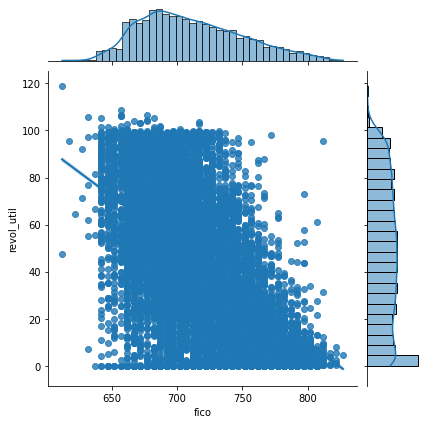

In [45]:
g = sns.jointplot(x='fico', y='revol_util', data=loan_data, kind='reg')

In [44]:
r2(loan_data['fico'], loan_data['revol_util'])

0.2929941441929266

2. FICO score and interest rate

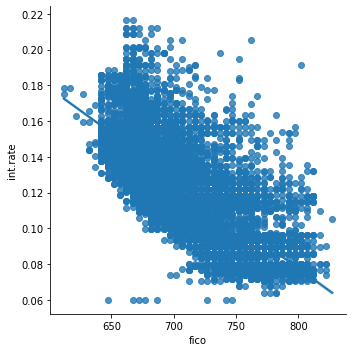

In [ ]:
g = sns.lmplot(x='fico', y='int.rate', data=loan_data)

In [ ]:
r2(loan_data['fico'], loan_data['int.rate'])

0.5109687352525679

### Preprocessing

##### Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Encode loan purpose
le = LabelEncoder()
loan_data["purpose"] = le.fit_transform(loan_data["purpose"])

loan_data.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


#### Normalization


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Revolving balance doesn't follow normal distribution 
loan_data['revol_bal'] # SHOW OG DIST HERE

0        28854
1        33623
2         3511
3        33667
4         4740
         ...  
9573    215372
9574       184
9575     10036
9576         0
9577     37879
Name: revol_bal, Length: 9578, dtype: int64

In [ ]:
# Normalize credit balance
scaler = MinMaxScaler()
loan_data['revol_bal'] = scaler.fit_transform(np.array(loan_data['revol_bal']).reshape(-1, 1))

loan_data.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,0.023898,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,0.027848,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,0.002908,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,0.027885,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,0.003926,39.5,0,1,0,0


#### Standardization 

In [ ]:
from sklearn.preprocessing import StandardScaler 

In [ ]:
# Scale installment, annual income, dti, fico score, credit line duration, credit line utilization 
scaler = StandardScaler()
loan_data['installment'], loan_data['log_annual_inc'], loan_data['dti'], loan_data['fico'], loan_data['days_with_cr_line'], loan_data['revol_util'] = scaler.fit_transform(np.array(loan_data[['installment', 'log_annual_inc', 'dti', 'fico', 'days_with_cr_line', 'revol_util']]).reshape(6,-1))

loan_data.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,2,0.1189,-0.089626,-0.627493,2.195185,-0.520359,-0.636980,0.023898,-0.320727,0,0,0,0
1,1,1,0.1071,-0.715814,1.320048,-0.658891,-0.718089,1.503675,0.027848,-0.730929,0,0,0,0
2,1,2,0.1357,-0.632908,0.365403,-0.594614,-0.638418,2.087983,0.002908,-0.587446,1,0,0,0
3,1,2,0.1008,1.510397,-0.612407,-0.724671,1.310452,-0.756675,0.027885,-0.727096,1,0,0,0
4,1,1,0.1426,2.176642,-0.468629,-0.654269,0.029400,-0.425205,0.003926,-0.657939,0,1,0,0


#### Balancing 

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# We create loan_ros for the after over-sampling data.
loan_ros = loan_data[['credit_policy', 'int_rate', 'installment',	'log_annual_inc', 'dti', 'fico', 'days_with_cr_line',	'revol_util',	'inq_last_6mths',	'delinq_2yrs', 'pub_rec', 'revol_bal', 'not_fully_paid']]
print(loan_ros['not_fully_paid'].value_counts(), "\n")

0    8045
1    1533
Name: not_fully_paid, dtype: int64 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


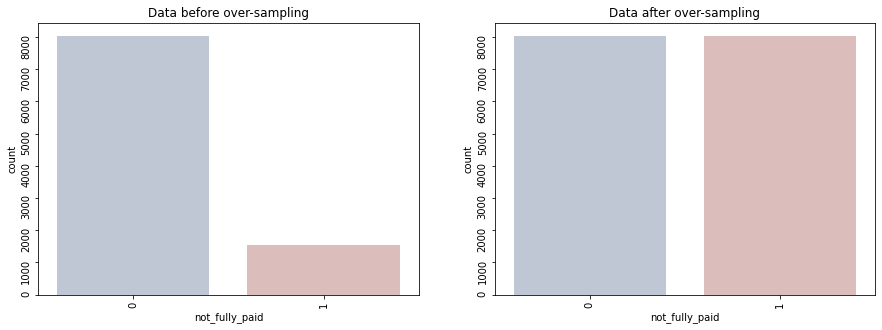

Data before over-sampling
0    8045
1    1533
Name: not_fully_paid, dtype: int64 

Data after over-sampling
0    8045
1    8045
Name: not_fully_paid, dtype: int64


In [ ]:
# over-sampling. We define X and y for loan_ros using the iloc function.
X = loan_ros.iloc[:,:-1]
y = loan_ros.iloc[:,-1]

ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(X, y)

loan_ros = x_ros
loan_ros['not_fully_paid'] = y_ros


#Now we want to visualize the after and before over-sampling data.
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.countplot('not_fully_paid', data=loan_data, ax=ax[0], palette="vlag")
ax[0].tick_params(labelrotation=90)
ax[0].set_title("Data before over-sampling")

sns.countplot('not_fully_paid', data=loan_ros, ax=ax[1], palette="vlag")
ax[1].tick_params(labelrotation=90)
ax[1].set_title("Data after over-sampling")

plt.show()

print("Data before over-sampling")
print(loan_data['not_fully_paid'].value_counts(), "\n")

print("Data after over-sampling")
print(loan_ros['not_fully_paid'].value_counts())

### Modeling

#### Train-test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Specifying what type of values our data set includes. This will make our fit and the RFE model easier
types = loan_ros.select_dtypes(['int64', 'float64', 'bool']).columns

In [ ]:
#Here we are defining our model and reiterating the X and y features.
loan_model = loan_ros
X = loan_model.iloc[:,:-1].values
y = loan_model.iloc[:,-1].values

In [ ]:
#When we were feature engineering the log_revol_bal would give us infinity values.
#The solution is to substitute with standardized value using the formula below
X = np.nan_to_num(X, posinf=True, neginf=True)

In [ ]:
#Checking to see if we are still getting infinity values, which we are not!
mean = np.mean(X)
median = np.median(X)
max = np.max(X)
 
#print("Array =", X_test)
print("Mean =", mean)
print("Median =", median)
print("Max =", max)

Mean = 0.25069446052353694
Median = 0.0
Max = 33.0


In [ ]:
#Here we are splitting the balanced data set to train the model on the new trained data set
#Further, we do not want to train the model on the new test set so we keep the old
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Model 1: Random Forest 

#### Model training

In [ ]:
#Importing RFE model
from sklearn.feature_selection import RFE

In [ ]:
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
for i in range(1,13):

  select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=i)

  select.fit(X_train, y_train)

  mask = select.get_support()

  X_train_rfe = select.transform(X_train)
  X_test_rfe = select.transform(X_test)

  score = RandomForestClassifier().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)

  print("Test score: {:.3f}".format(score), " number of features: {}".format(i))
  #Here we are testing the number of features for our model to find the optimal combination.

Test score: 0.896  number of features: 1
Test score: 0.919  number of features: 2
Test score: 0.947  number of features: 3
Test score: 0.954  number of features: 4
Test score: 0.962  number of features: 5
Test score: 0.960  number of features: 6
Test score: 0.963  number of features: 7
Test score: 0.963  number of features: 8
Test score: 0.960  number of features: 9
Test score: 0.951  number of features: 10
Test score: 0.954  number of features: 11
Test score: 0.953  number of features: 12


In [ ]:
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=8)

select.fit(X_train, y_train)

mask = select.get_support()

X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = RandomForestClassifier().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)

print("Test score: {:.3f}".format(score), " number of features: {}".format(8))

features = pd.DataFrame({'features':list(loan_data[types].iloc[:,:-1].columns), 'select':list(mask)})
display(features.T)
features = list(features[features['select']==True]['features'])
print("The selected features are: " "\n")
display(features)

# We find that 8 features provide the highest test score!

Test score: 0.961  number of features: 8


,0,1,2,3,4,5,6,7,8,9,10,11
features,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,revol_bal
select,False,True,True,True,True,True,True,True,False,False,False,True


The selected features are: 



['int_rate',
 'installment',
 'log_annual_inc',
 'dti',
 'fico',
 'days_with_cr_line',
 'revol_util',
 'revol_bal']

#### Model prediction


In [ ]:
# Predict target from test data 
y_pred = select.predict(X_test)
y_pred

array([1, 1, 1, ..., 0, 1, 0])

#### Model evaluation 

In [ ]:
# import classification etrics 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.metrics import plot_confusion_matrix

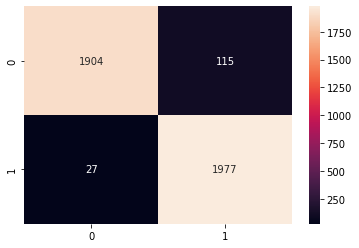

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      2019
           1       0.95      0.99      0.97      2004

    accuracy                           0.96      4023
   macro avg       0.97      0.96      0.96      4023
weighted avg       0.97      0.96      0.96      4023



### Model 2: Logistic Regresssion 

#### Model training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metr

In [ ]:
lr = LogisticRegression(solver = 'liblinear', C=10, max_iter = 500) # WILL NEED TO HYPERPARAMETER TUNE TO GET RESULTS
lr.fit(X_train, y_train)



LogisticRegression(C=10, max_iter=500, solver='liblinear')

#### Model prediction 

In [ ]:
y_pred = lr.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 0, 1])

#### Model evaluation

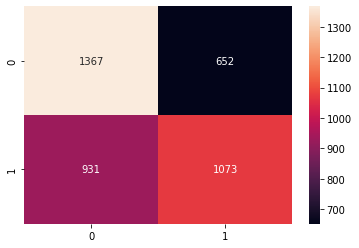

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.68      0.63      2019
           1       0.62      0.54      0.58      2004

    accuracy                           0.61      4023
   macro avg       0.61      0.61      0.60      4023
weighted avg       0.61      0.61      0.60      4023



## Results



* <sub> Random Forest Model Precision 0.97, Recall 0.96 </sub> 
* <sub> Logistic Regression Model Precision 0.61, Recall 0.61 </sub> 

Both model results are much better than our performance metrics of 70% recall and 90% precision!
